<a href="https://colab.research.google.com/github/saumyam2/Language-Prediction/blob/main/NLP_Language_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

Reading the initial dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Synapse_ML_seminar/Language Detection.csv')
df

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
...,...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada


Checking the count of sentences in each language

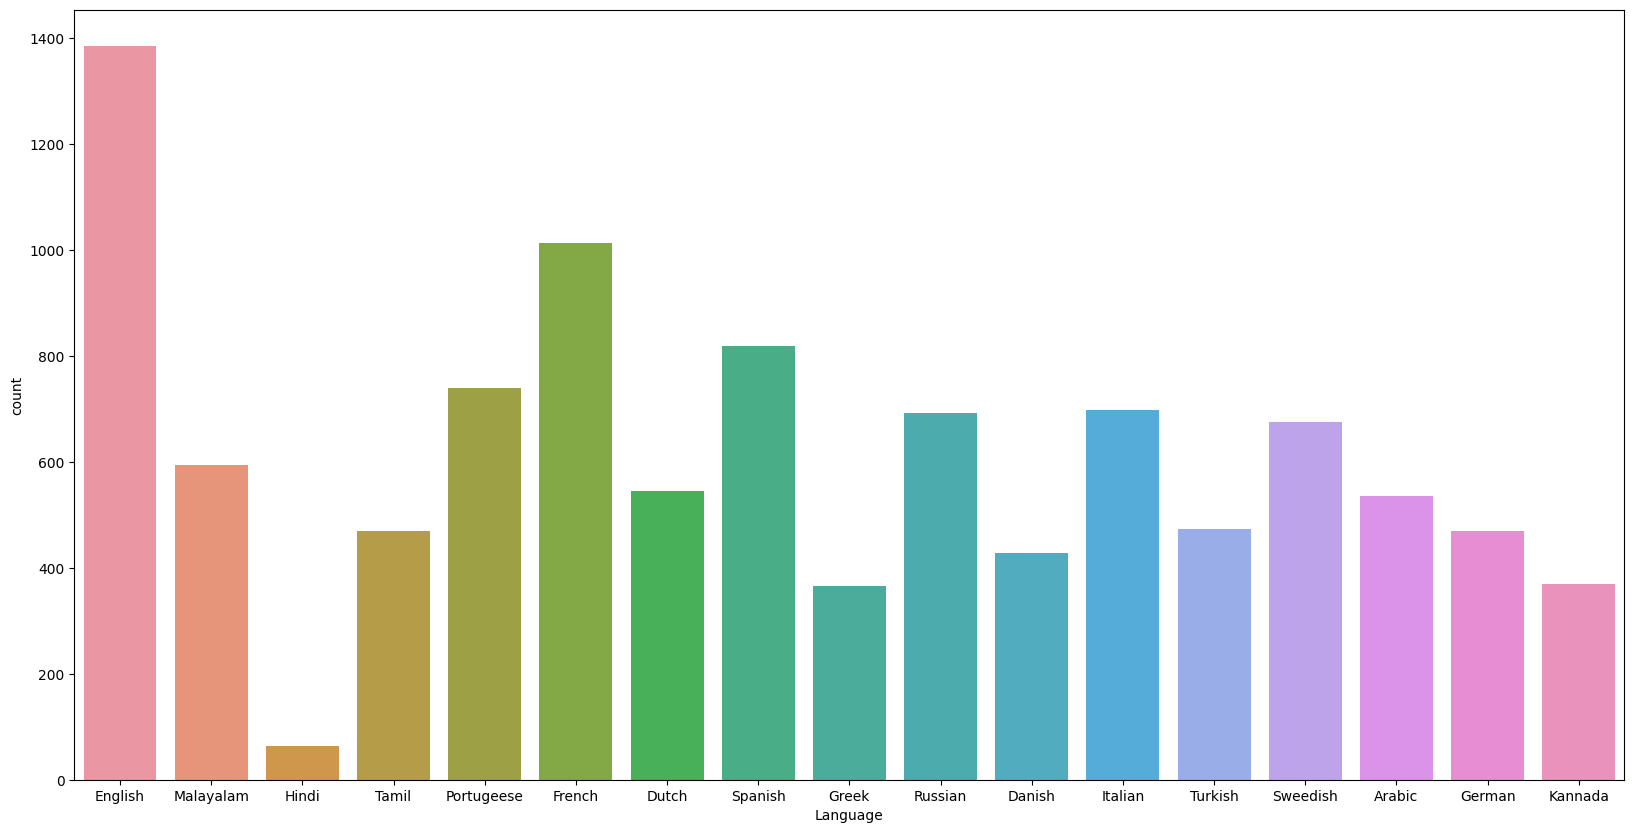

In [ ]:
plt.figure(figsize = (20, 10))
sns.countplot(x='Language',data=df)
plt.show()

In [ ]:
df['Language'].unique()

array(['English', 'Malayalam', 'Hindi', 'Tamil', 'Portugeese', 'French',
       'Dutch', 'Spanish', 'Greek', 'Russian', 'Danish', 'Italian',
       'Turkish', 'Sweedish', 'Arabic', 'German', 'Kannada'], dtype=object)

Word Cloud and N popular words

In [ ]:
from nltk.corpus import stopwords
import nltk

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

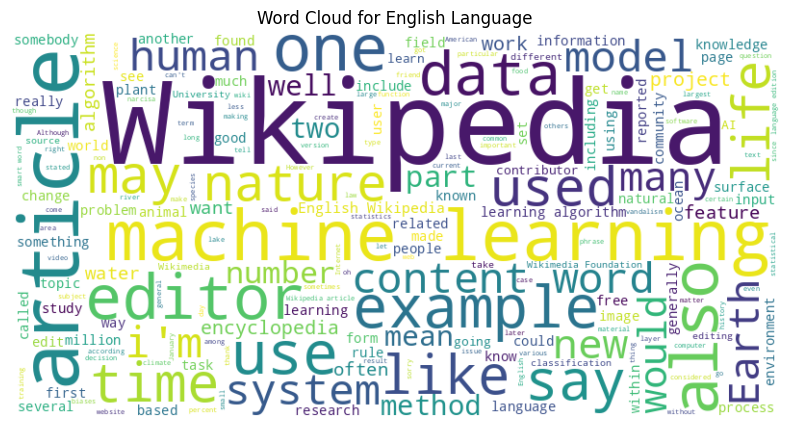

In [ ]:
# Display a word cloud for few languages

text = " ".join(df[df['Language'] == 'English']['Text'])
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=set(stopwords.words('english'))).generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear') #interpolation bilinear means smoother experience when resizing image
plt.title(f"Word Cloud for English Language")
plt.axis('off')
plt.show()

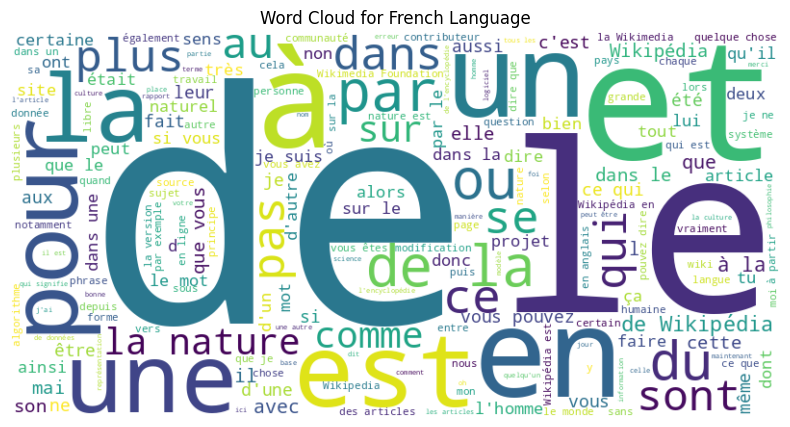

In [ ]:
text = " ".join(df[df['Language'] == 'French']['Text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title(f"Word Cloud for French Language")
plt.axis('off')
plt.show()

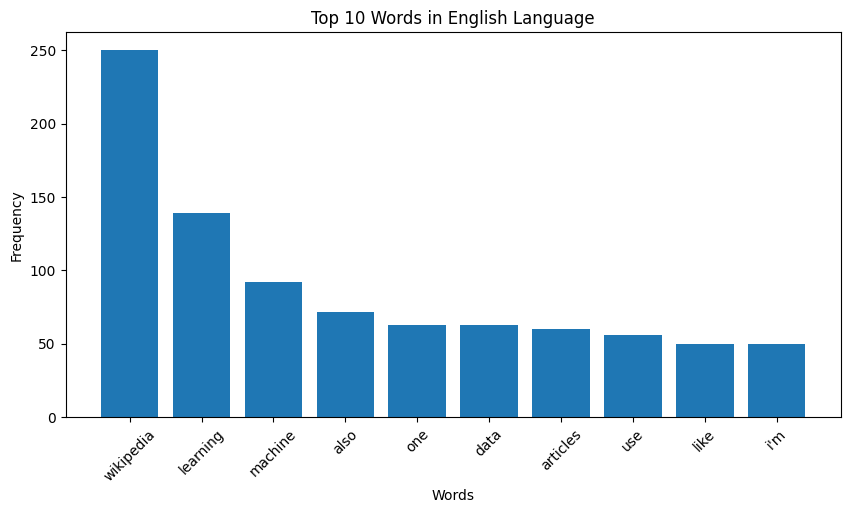

In [ ]:
# Bar chart for top N words in each language
top_n = 10
text = " ".join(df[df['Language'] == 'English']['Text'])
text = text.lower()
words = text.split()
words = [word for word in words if word not in set(stopwords.words('english'))]
word_freq = nltk.FreqDist(words)
common_words = word_freq.most_common(top_n)
x_values, y_values = zip(*common_words)
plt.figure(figsize=(10, 5))

plt.bar(x_values, y_values)
plt.title(f"Top {top_n} Words in English Language")
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df.shape

(10337, 2)

Checking if there are null values

In [ ]:
df.isna().sum()

Text        0
Language    0
dtype: int64

In [ ]:
df['Language'].value_counts()

English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: Language, dtype: int64

Using CountVectorizer to convert the phrases to vectors so that the model can process it

In [ ]:
x=np.array(df['Text'])
y=np.array(df['Language'])

cv=CountVectorizer(lowercase=True)
X=cv.fit_transform(x)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=41)

In [ ]:
#Visualizing the CountVectorizer
print(X.toarray()[0])
fn = cv.get_feature_names_out()
print(fn)

[0 0 0 ... 0 0 0]
['00' '000' '000க' ... 'ൾക' 'ൾപ' 'ൾമ']


Checking the accuracy given by DecisionTreeClassifier model

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train,y_train)
dt.score(X_test,y_test)

0.8704061895551257

Checking the accuracy given by Multinomial Naive Bayes model

In [ ]:
model=MultinomialNB(alpha=0.05)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9859767891682786

Evaluating performance of model using classification metrics

In [ ]:
pred=model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

      Arabic       1.00      0.96      0.98       107
      Danish       1.00      0.97      0.99        75
       Dutch       0.99      1.00      0.99        98
     English       0.98      1.00      0.99       283
      French       1.00      0.99      1.00       214
      German       1.00      0.97      0.99       102
       Greek       1.00      1.00      1.00        74
       Hindi       1.00      0.92      0.96        13
     Italian       0.99      0.99      0.99       137
     Kannada       0.92      0.96      0.94        76
   Malayalam       0.90      1.00      0.95       104
  Portugeese       0.99      1.00      0.99       135
     Russian       1.00      0.99      1.00       147
     Spanish       1.00      0.99      0.99       184
    Sweedish       0.99      0.98      0.98       127
       Tamil       1.00      1.00      1.00        90
     Turkish       1.00      0.94      0.97       102

    accuracy              

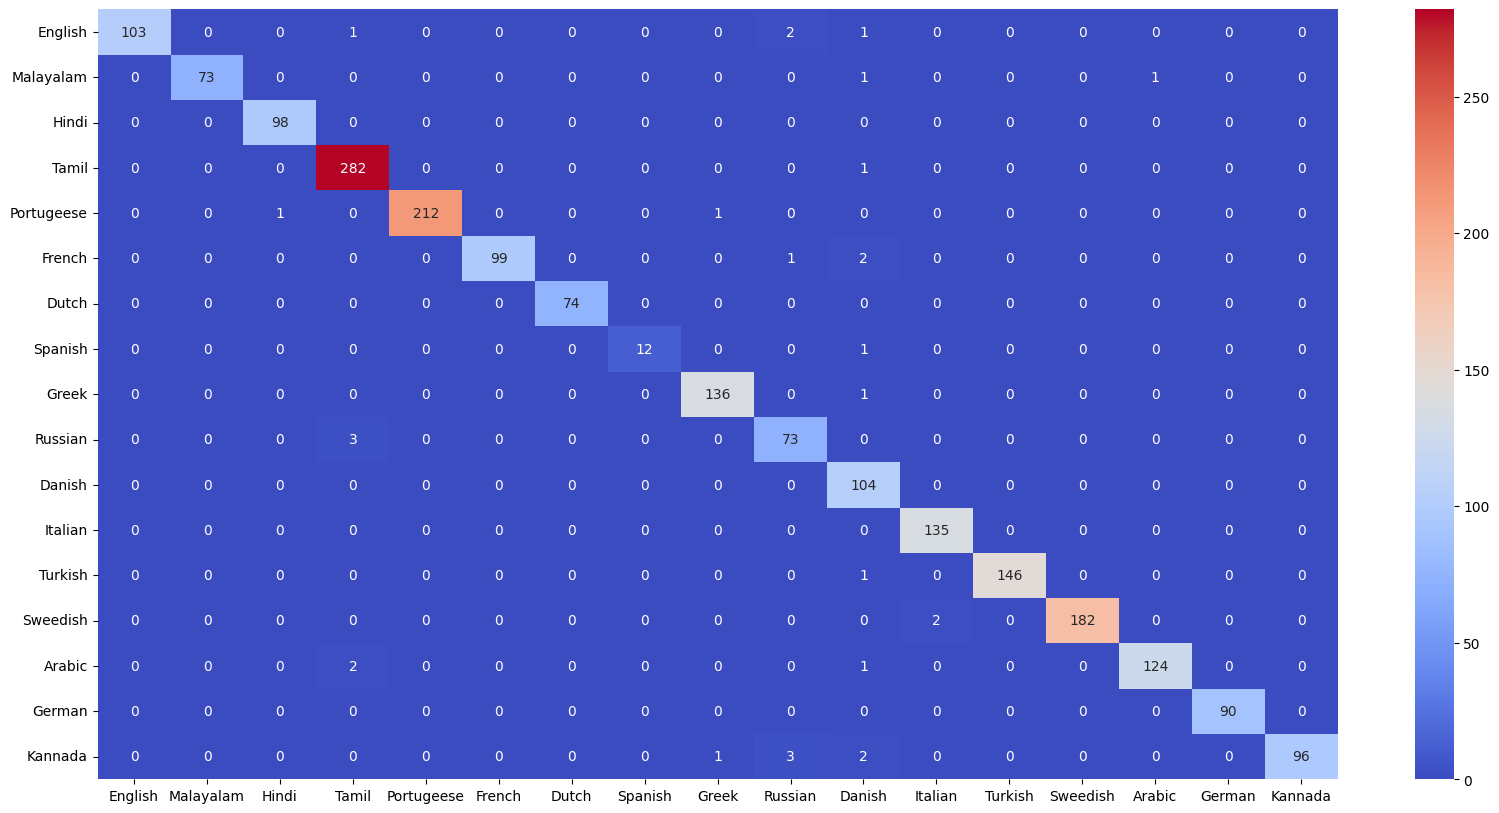

In [ ]:
cf = confusion_matrix(y_test,pred)
plt.figure(figsize=(20,10))
unique_labels = df['Language'].unique()
sns.heatmap(cf,annot=True,fmt='g',cmap='coolwarm', xticklabels=unique_labels, yticklabels=unique_labels)
plt.show()

Taking user input of a sentence and using the trained model to predict the language of the sentence

In [ ]:
user=input("Enter sentence: ")
ans=np.array([user])
enc_ans=cv.transform(ans)
output=model.predict(enc_ans)
print('The detected language is: ',output[0])

Enter sentence: ನಮಸ್ಕಾರ ನಮಸ್ಕಾರ
The detected language is:  Kannada


Use Pipeline to streamline the process of prediction

In [ ]:
import numpy as np
from sklearn.pipeline import Pipeline

# Define the pipeline
pipeline = Pipeline([
    ('vectorizer', cv),
    ('classifier', model)
])

user_input = input("Enter sentence: ")

predicted_language = pipeline.predict([user_input])[0]

print('The detected language is:', predicted_language)


Enter sentence: ನುಡಿಗಟ್ಟುಗಳು
The detected language is: Kannada
